In [46]:
%pip install tensorflow
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [47]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import random

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
random.seed(42)
tf.random.set_seed(42)
np.random.seed(42)

In [48]:
## uint8 = 0-254 (255 values)
Y_train.dtype

dtype('uint8')

In [49]:
## Preprocessing of data
X_train = X_train[0:1000] 
Y_train = Y_train[0:1000] 
X_test = X_test[0:200]
Y_test = Y_test[0:200]

## Normalization of data
X_train, X_test = X_train / 255.0, X_test / 255.0 

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
##First hidden layer
model.add(Dense(64, activation='elu', kernel_initializer='he_normal'))
## Second Hidden layer
model.add(Dense(64, activation='elu', kernel_initializer='he_normal'))
## Third hidden layer
model.add(Dense(64, activation='elu', kernel_initializer='he_normal'))
## Output layer
model.add(Dense(10, activation='softmax'))

## modell fitting values
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


/Users/daviddevoldpearson/take-2-ML-3/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
nadam_optimizer = Nadam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=nadam_optimizer,metrics=['accuracy'])
history = model.fit(X_train, Y_train,epochs=50, callbacks=early_stopping, batch_size=32, validation_split=0.2)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5350 - loss: 1.5731 - val_accuracy: 0.7250 - val_loss: 0.9621
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.6004 - val_accuracy: 0.8150 - val_loss: 0.6821
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.3469 - val_accuracy: 0.8050 - val_loss: 0.6326
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.2382 - val_accuracy: 0.8200 - val_loss: 0.6323
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.1736 - val_accuracy: 0.8150 - val_loss: 0.6458
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.1289 - val_accuracy: 0.8100 - val_loss: 0.6636
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9875 - loss: 0.0954 - val_accuracy: 0.8150 - val_loss: 0.6856
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0697 - val_accuracy: 0.8250 - val_loss:

In [51]:
test_accuracy = model.evaluate(X_test, Y_test, batch_size=32)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.3846


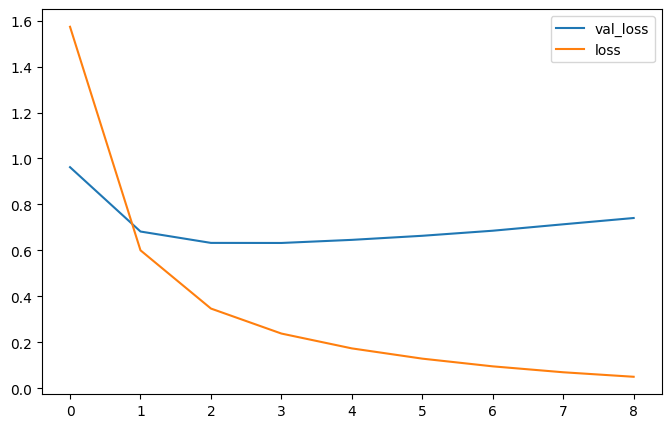

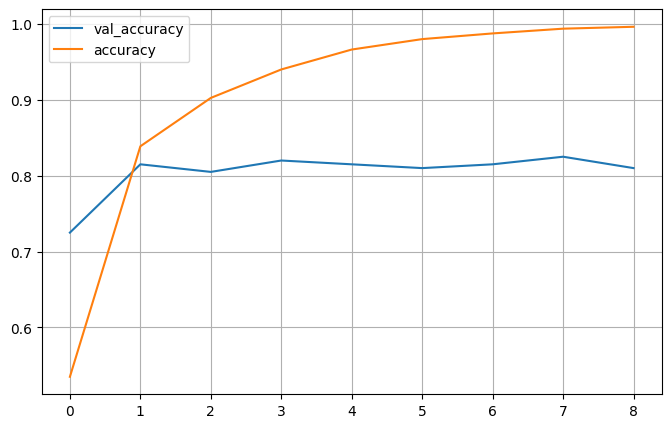

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.DataFrame(history.history)
dataframe[['val_loss', 'loss']].plot(figsize=(8,5))
dataframe[['val_accuracy', 'accuracy']].plot(figsize=(8,5))
plt.grid(True)
plt.show()